In [ ]:
!unzip 'lab8_partial (2).zip'

Archive:  lab8_partial (2).zip
  inflating: data/3d-points/x_test.txt  
  inflating: data/3d-points/x_train.txt  
  inflating: data/3d-points/y_test.txt  
  inflating: data/3d-points/y_train.txt  
  inflating: data/MNIST/test_images.txt  
  inflating: data/MNIST/test_labels.txt  
  inflating: data/MNIST/train_images.txt  
  inflating: data/MNIST/train_labels.txt  
  inflating: lab8_partial.ipynb      
  inflating: lab8_partial.py         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
from mpl_toolkits import mplot3d

def plot3d_data_and_decision_function(X, y, W, b): 
    ax = plt.axes(projection='3d') # create x,y 

    xx, yy = np.meshgrid(range(10), range(10)) # calculate corresponding z # [x, y, z] * [W[0], W[1], W[2]] + b = 0 

    zz = (-W[0] * xx - W[1] * yy - b) / W[2] 

    ax.plot_surface(xx, yy, zz, alpha=0.5) 
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b'); 
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r'); 
    plt.show()

In [ ]:
X = np.loadtxt('data/3d-points/x_train.txt')
y = np.loadtxt('data/3d-points/y_train.txt', dtype =float).astype(int)

X_test = np.loadtxt('data/3d-points/x_test.txt')
y_test = np.loadtxt('data/3d-points/y_test.txt', dtype =float).astype(int)

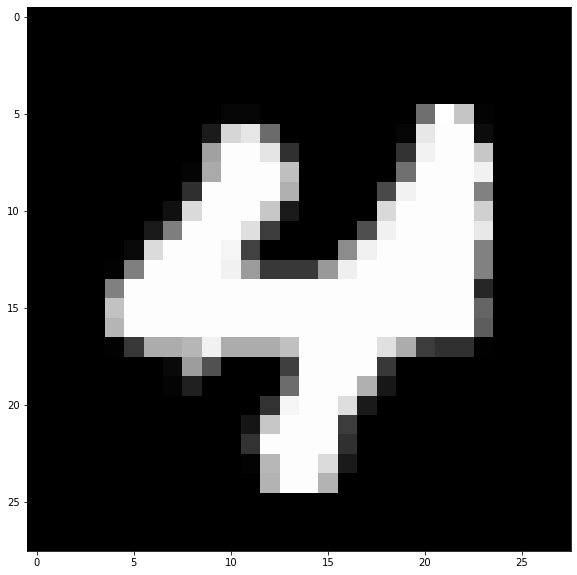

In [ ]:
train_images = np.loadtxt('data/MNIST/train_images.txt')
train_labels = np.loadtxt('data/MNIST/train_labels.txt', dtype =float).astype(int)

test_images = np.loadtxt('data/MNIST/test_images.txt')
test_labels = np.loadtxt('data/MNIST/test_labels.txt', dtype =float).astype(int)

plt.imshow(train_images[0].reshape(28, 28), cmap='gray')

0.881 0.905
[-1.64921166 -1.84272361 -1.97507964] [21.2] 11


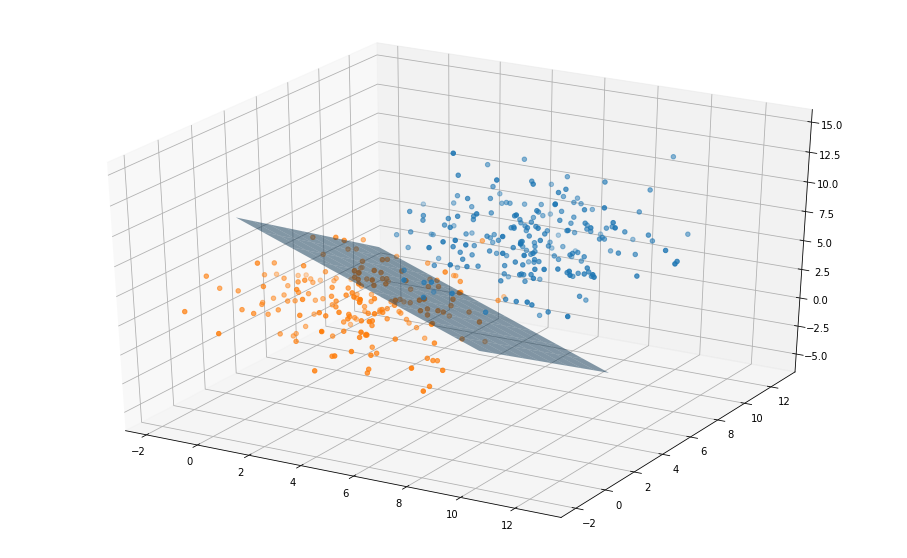

In [ ]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(tol=1e-5, eta0=0.1, max_iter=20)

perceptron_model.fit(X, y)

train_acc = perceptron_model.score(X, y)
test_acc = perceptron_model.score(X_test, y_test)

print(train_acc, test_acc)

ponderi = perceptron_model.coef_[0]
bias = perceptron_model.intercept_
epoci = perceptron_model.n_iter_

print(ponderi, bias, epoci)

plot3d_data_and_decision_function(X_test, y_test, ponderi, bias) 

In [ ]:
X = np.loadtxt('./data/3d-points/x_train.txt')
y = np.loadtxt('./data/3d-points/y_train.txt', dtype=float).astype(int) 


X_test = np.loadtxt('./data/3d-points/x_test.txt')
y_test = np.loadtxt('./data/3d-points/y_test.txt', dtype=float).astype(int)

perceptron_model = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, 
  max_iter=200, tol=1e-5, shuffle=True, eta0=0.1, early_stopping=True, 
  validation_fraction=0.1, n_iter_no_change=1)

perceptron_model.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=True, eta0=0.1,
           fit_intercept=True, max_iter=200, n_iter_no_change=1, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-05,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(train_images)

X2_test = scaler.transform(test_images)

y2 = train_labels
y2_test = test_labels


X_train_scaled = scaler.transform(train_images)
X_test_scaled = scaler.transform(test_images)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(1), learning_rate_init=0.0001, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.192


In [ ]:
 # b
mlp_classifier_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(10),
                        learning_rate_init=0.01, momentum=0, max_iter=200)

mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.82


In [ ]:
# c
mlp_classifier_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(10),
            learning_rate_init=0.00001, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.354


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
 
# d

mlp_classifier_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(10),
            learning_rate_init=10, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.472


In [ ]:
# f

clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

0.99
0.78


In [ ]:
# g
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 10),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

0.998
0.836


In [ ]:
# h

clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)

clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

1.0
0.902


In [ ]:
# i

clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000)

clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

1.0
0.886


In [ ]:
# j
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000, alpha=0.05)

clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

1.0
0.906


0.891
0.92
[[-1.18841049 -1.33054551 -1.67664006]]
[16.9]
6


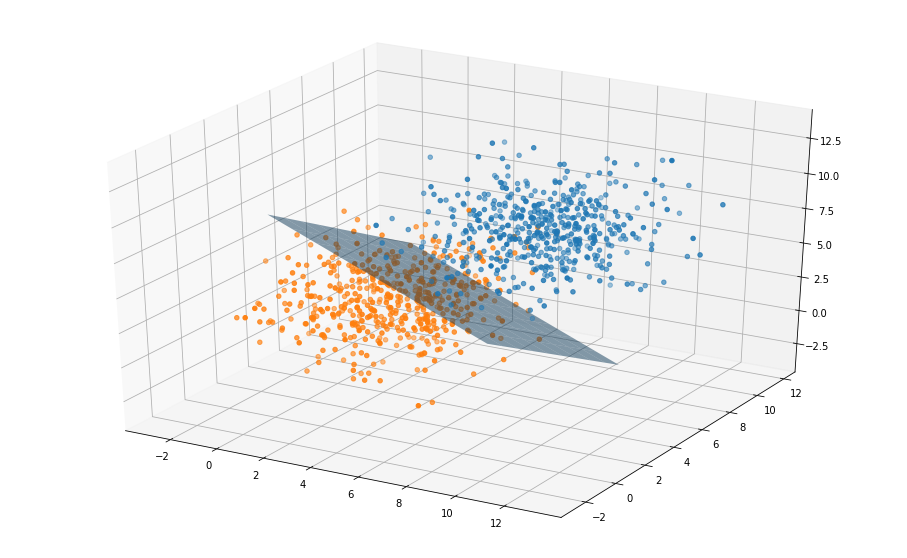

In [ ]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(tol=1e-6, early_stopping=True, eta0=0.1, max_iter=20)

perceptron_model.fit(X, y)

print(perceptron_model.score(X, y))
print(perceptron_model.score(X_test, y_test))

weights = perceptron_model.coef_
print(weights)

bias = perceptron_model.intercept_
print(bias)

print(perceptron_model.n_iter_)

plot3d_data_and_decision_function(X, y, weights[0], bias)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# a
mlp_classifier_model = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(1,),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=200
 )
mlp_classifier_model.fit(X, y)
print("a:")
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

# b
mlp_classifier_model = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=200,
    early_stopping=True
 )
print("b:")
mlp_classifier_model.fit(X, y)
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

mlp_classifier_model = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.00001,
    momentum=0,
    max_iter=200
 )
mlp_classifier_model.fit(X, y)
print("c:")
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

mlp_classifier_model = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=10,
    momentum=0,
    max_iter=200
 )
mlp_classifier_model.fit(X, y)
print("d:")
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

mlp_classifier_model = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=20
 )
mlp_classifier_model.fit(X, y)
print("e:")
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

mlp_classifier_model = MLPClassifier(
    activation='tanh',
    x
    learning_rate_init=0.01,
    momentum=0,
    max_iter=2000
 )
mlp_classifier_model.fit(X, y)
print("f:")
print(mlp_classifier_model.score(X, y))
print(mlp_classifier_model.score(X_test, y_test))

a:
0.253
0.208
b:
0.878
0.808


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


c:
0.284
0.266
d:
0.392
0.372


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


e:
0.969
0.842
f:
0.999
0.776


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# inputs = tf.keras.Input(shape=(None, 784))

# x = layers.Dense(10, activation='relu')(inputs)
# # x = layers.Dropout(0.2)(x)
# x = layers.Dense(10, activation='relu')(x)

# outputs = layers.Dense(10, activation='softmax')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model.summary()

inputs = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding='SAME')(inputs)
# x = layers.Dropout(0.4)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='SAME')(x)
# x = layers.Dropout(0.4)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='SAME')(x)
x = layers.Dropout(0.4)(x)

# x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0  

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

In [ ]:
model.fit(X_train_scaled.reshape(-1, 28, 28, 1), train_labels, batch_size=64, epochs=128, validation_data=(X_test_scaled.reshape(-1, 28, 28, 1), test_labels))
# model.fit(X_train_scaled, train_labels, batch_size=32, epochs=64, validation_data=(X_test_scaled, test_labels))

Epoch 1/128
16/16 [==============================] - 1s 15ms/step - loss: 1.8334 - accuracy: 0.3567 - val_loss: 0.7951 - val_accuracy: 0.7920
Epoch 2/128
16/16 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.7944 - val_loss: 0.7487 - val_accuracy: 0.8660
Epoch 3/128
16/16 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.8993 - val_loss: 0.7224 - val_accuracy: 0.8900
Epoch 4/128
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - accuracy: 0.9257 - val_loss: 0.4173 - val_accuracy: 0.9140
Epoch 5/128
16/16 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.9285 - val_loss: 0.3723 - val_accuracy: 0.9280
Epoch 6/128
16/16 [==============================] - 0s 6ms/step - loss: 0.1288 - accuracy: 0.9587 - val_loss: 0.3759 - val_accuracy: 0.8940
Epoch 7/128
16/16 [==============================] - 0s 7ms/step - loss: 0.1616 - accuracy: 0.9360 - val_loss: 0.4149 - val_accuracy: 0.9140
Epoch 8/128


(1000, 784)

In [ ]:
import torch


class MNISTDataset(torch.utils.data.Dataset):

    def __init__(self, images, labels, num_classes, transform=None):
        
        self.images = images
        self.labels = labels
        self.C = num_classes
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label_idx = self.labels[idx]

        label = np.zeros(self.C)
        label[label_idx] = 1
        
        augmented = self.transform(image=img)

        img = augmented['image']
            
        label = torch.tensor(label)
        
        return {'image': img, 'label': label}

class MNISTModel(torch.nn.Module):
    
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3)),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16),
            torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=2),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.Dropout(0.25)
        )
        
        self.flatten = torch.nn.Sequential(torch.nn.AdaptiveMaxPool2d(1), torch.nn.Flatten())
        
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(64, num_classes)
        )
        
    def forward(self, inputs):
        x = self.conv(inputs)
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensor

transform_train = A.Compose([
    # Normalize(mean=MEANS, std=STDS),
    A.Blur(blur_limit=3, p=0.1),
    A.ShiftScaleRotate(rotate_limit=30, p=0.3),
    A.ElasticTransform(p=0.1),
    ToTensor()
])

transform_test = A.Compose([
    # Normalize(mean=MEANS, std=STDS),
    ToTensor()
])

train_dataset = MNISTDataset(train_images.reshape(-1, 28, 28, 1), train_labels, 10, transform=transform_train)

test_dataset = MNISTDataset(test_images.reshape(-1, 28, 28, 1), test_labels, 10, transform=transform_test)

data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
data_loader_test = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_iter = iter(data_loader_train)
batch = next(dataset_iter)

print(batch['image'].shape)
print(batch['image'].mean())
print(batch['image'].std())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 28, 28])
tensor(32.8441)
tensor(76.0412)


In [ ]:
model = MNISTModel(10)

device = torch.device("cuda:0")
# device = torch.device("cpu")
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

In [ ]:
# Train
n_epochs = 64

for epoch in range(n_epochs):
    
    print('-' * 10)
    print('Epoch {}/{}'.format(epoch + 1, n_epochs))
    print('-' * 10)

    tr_loss = 0
    tr_acc = 0
    model.train()
    for step, batch in enumerate(data_loader_train):

        inputs = batch["image"]
        labels = batch["label"]

        inputs = inputs.to(device, dtype=torch.float)
        labels = labels.to(device, dtype=torch.long)

        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])

        loss.backward()

        tr_loss += loss.item()
        tr_acc += (torch.max(outputs, 1)[1] == torch.max(labels, 1)[1]).type(torch.FloatTensor).mean().item()

        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = tr_loss / len(data_loader_train)
    epoch_acc = tr_acc / len(data_loader_train)
    print('Training Loss/Accuracy:\t{:.4f}\t{:.4f}'.format(epoch_loss, epoch_acc))
    # print('Training Accuracy: {:.4f}'.format(epoch_acc))
    
    # print('-' * 10)
    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.no_grad():
        for step, batch in enumerate(data_loader_test):
            inputs = batch["image"]
            labels = batch["label"]

            inputs = inputs.to(device, dtype=torch.float)
            labels = labels.to(device, dtype=torch.long)

            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])

            test_loss += loss.item()
            test_acc += (torch.max(outputs, 1)[1] == torch.max(labels, 1)[1]).type(torch.FloatTensor).mean().item()

    epoch_loss = test_loss / len(data_loader_test)
    epoch_acc = test_acc / len(data_loader_test)
    print('Validati Loss/Accuracy:\t{:.4f}\t{:.4f}'.format(epoch_loss, epoch_acc))
    # print('Valid Accuracy: {:.4f}'.format(epoch_acc))

----------
Epoch 1/64
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training Loss/Accuracy:	2.4749	0.2266
Validati Loss/Accuracy:	1.8430	0.3176
----------
Epoch 2/64
----------
Training Loss/Accuracy:	1.7099	0.4219
Validati Loss/Accuracy:	1.3673	0.5875
----------
Epoch 3/64
----------
Training Loss/Accuracy:	1.4695	0.5234
Validati Loss/Accuracy:	1.1088	0.6500
----------
Epoch 4/64
----------
Training Loss/Accuracy:	1.4065	0.5459
Validati Loss/Accuracy:	0.9483	0.7285
----------
Epoch 5/64
----------
Training Loss/Accuracy:	1.1786	0.6348
Validati Loss/Accuracy:	0.8672	0.7340
----------
Epoch 6/64
----------
Training Loss/Accuracy:	1.1256	0.6455
Validati Loss/Accuracy:	0.7666	0.7730
----------
Epoch 7/64
----------
Training Loss/Accuracy:	0.9027	0.7148
Validati Loss/Accuracy:	0.6317	0.8215
----------
Epoch 8/64
----------
Training Loss/Accuracy:	0.9177	0.7207
Validati Loss/Accuracy:	0.5334	0.8648
----------
Epoch 9/64
----------
Training Loss/Accuracy:	0.9086	0.7148
Validati Loss/Accuracy:	0.5069	0.8539
----------
Epoch 10/64
----------
Training Loss/Accu